Let's start by visualizing the data we have, first we can see from the [documentaion](https://mindbigdata.com/opendb/index.html) that the file is in the following format:

> FILE FORMAT:
> 
> The data is stored in a very simple text format including:
> 
> [id]: a numeric, only for reference purposes.
> 
> [event] id, a integer, used to distinguish the same event captured at different brain locations, used only by multichannel devices (all except MW).
> 
> [device]: a 2 character string, to identify the device used to capture the signals, "MW" for MindWave, "EP" for Emotive Epoc, "MU" for Interaxon Muse & "IN" for Emotiv Insight.
> 
> [channel]: a string, to indentify the 10/20 brain location of the signal, with possible values:
>  
> MindWave	"FP1"
> EPOC	"AF3, "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"
> Muse	"TP9,"FP1","FP2", "TP10"
> Insight	"AF3,"AF4","T7","T8","PZ" 
> 
> [code]: a integer, to indentify the digit been thought/seen, with possible values 0,1,2,3,4,5,6,7,8,9 or -1 for random captured signals not related to any of the digits.
> 
> [size]: a integer, to identify the size in number of values captured in the 2 seconds of this signal, since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds.
> 
> [data]: a coma separated set of numbers, with the time-series amplitude of the signal, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN.
> 
> There is no headers in the files,  every line is  a signal, and the fields are separated by a tab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
data_path = Path('../data')
file_path = data_path / 'EP1.01.txt'

columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']
data = pd.read_csv(file_path, delimiter='\t', header=None, names=columns)

In [6]:
data.head()

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
1,67636,67635,EP,F7,6,260,"4489.230769,4475.384615,4474.358974,4486.66666..."
2,67637,67635,EP,F3,6,260,"4538.461538,4528.717948,4524.615384,4526.15384..."
3,67638,67635,EP,FC5,6,260,"4207.692307,4205.641025,4200.512820,4194.35897..."
4,67639,67635,EP,T7,6,260,"4497.948717,4498.461538,4494.871794,4497.94871..."


Lets start by plotting the data for channel "AF3" which is found on the Frontal lobe cortex - You can find more information about the locations in this page [10–20 system (EEG)](https://en.wikipedia.org/wiki/10–20_system_(EEG))

In [13]:
AF3_signal_data = data.loc[data['channel'] == 'AF3']
AF3_signal_data

,id,event_id,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
14,67649,67636,EP,AF3,7,260,"4385.641025,4381.538461,4386.666666,4383.58974..."
28,67663,67637,EP,AF3,9,256,"4380.512820,4389.743589,4395.897435,4395.38461..."
42,67677,67638,EP,AF3,9,264,"4395.897435,4390.769230,4403.589743,4411.28205..."
56,67691,67639,EP,AF3,0,260,"4395.384615,4385.128205,4382.051282,4390.76923..."
...,...,...,...,...,...,...,...
910406,978041,132664,EP,AF3,-1,256,"4401.025641,4413.846153,4410.769230,4395.89743..."
910420,978055,132665,EP,AF3,-1,256,"4419.487179,4418.461538,4423.076923,4435.89743..."
910434,978069,132666,EP,AF3,-1,256,"4414.871794,4402.564102,4392.307692,4397.94871..."
910448,978083,132667,EP,AF3,-1,256,"4489.743589,4491.282051,4489.230769,4488.71794..."


It looks like we have lots of data here, let's filter out by code as well and we will look at digit number "1" for the number "1" that was seen by the subject

In [14]:
AF3_signal_data_digit_1 = AF3_signal_data.loc[AF3_signal_data['code'] == 1]
AF3_signal_data_digit_1

,id,event_id,device,channel,code,size,data
294,67929,67656,EP,AF3,1,260,"4396.923076,4404.615384,4403.589743,4402.56410..."
308,67943,67657,EP,AF3,1,256,"4390.256410,4387.179487,4387.179487,4389.74358..."
364,67999,67661,EP,AF3,1,260,"4373.333333,4376.923076,4392.307692,4390.25641..."
406,68041,67664,EP,AF3,1,261,"4385.641025,4388.205128,4383.076923,4382.56410..."
546,68181,67674,EP,AF3,1,256,"4369.743589,4381.025641,4385.128205,4384.10256..."
...,...,...,...,...,...,...,...
907942,975577,132488,EP,AF3,1,260,"4375.897435,4377.948717,4381.025641,4379.48717..."
907998,975633,132492,EP,AF3,1,260,"4431.794871,4422.564102,4420.000000,4427.17948..."
908082,975717,132498,EP,AF3,1,260,"4304.102564,4300.512820,4293.846153,4291.79487..."
908096,975731,132499,EP,AF3,1,260,"4264.102564,4265.641025,4274.871794,4274.87179..."


Now as we remember event_id is another identification that is used to tell us that this specific recording is related to the specified "event" (number shown or nothing was shown)

Let's pick the first row we have for now, just to get a grip of what we see.

In [21]:
AF3_signal_data_digit_1_first_index = AF3_signal_data_digit_1.head(1)
AF3_signal_data_digit_1_first_index

,id,event_id,device,channel,code,size,data
294,67929,67656,EP,AF3,1,260,"4396.923076,4404.615384,4403.589743,4402.56410..."


In [47]:
signal_data = list(map(float, AF3_signal_data_digit_1_first_index['data'].to_list()[0].split(',')))
signal_data

[4396.923076,
 4404.615384,
 4403.589743,
 4402.564102,
 4411.794871,
 4413.846153,
 4401.538461,
 4398.461538,
 4400.0,
 4388.205128,
 4379.487179,
 4387.692307,
 4396.410256,
 4396.923076,
 4397.435897,
 4400.0,
 4400.51282,
 4399.487179,
 4400.0,
 4399.487179,
 4392.307692,
 4388.205128,
 4393.333333,
 4390.25641,
 4384.102564,
 4390.25641,
 4394.358974,
 4392.820512,
 4401.538461,
 4404.102564,
 4392.820512,
 4391.282051,
 4397.435897,
 4395.384615,
 4391.282051,
 4390.25641,
 4389.743589,
 4386.153846,
 4384.102564,
 4388.717948,
 4396.410256,
 4395.384615,
 4386.666666,
 4379.487179,
 4378.974358,
 4377.435897,
 4377.435897,
 4380.0,
 4381.025641,
 4387.179487,
 4394.358974,
 4384.102564,
 4376.410256,
 4391.794871,
 4402.564102,
 4391.794871,
 4384.615384,
 4388.205128,
 4381.538461,
 4370.25641,
 4372.307692,
 4380.0,
 4385.128205,
 4388.205128,
 4389.230769,
 4387.692307,
 4383.589743,
 4375.897435,
 4375.897435,
 4387.179487,
 4385.641025,
 4373.846153,
 4375.384615,
 4376.92

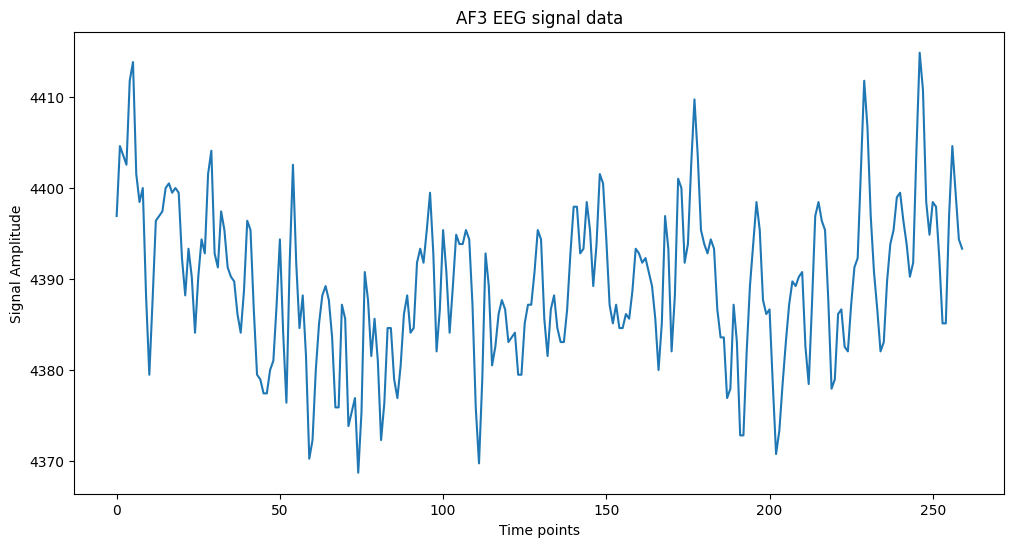

In [48]:
plt.figure(figsize=(12,6))
plt.plot(signal_data)
plt.title('AF3 EEG signal data')
plt.xlabel('Time points')
plt.ylabel('Signal Amplitude')
plt.show()

Fantastic! now I would like to see all the amplitudes for the same digit on one plot

In [54]:
all_events = [list(map(float, list(map(float, event.split(','))))) for event in AF3_signal_data_digit_1['data']]
all_events[0], len(all_events)

([4396.923076,
  4404.615384,
  4403.589743,
  4402.564102,
  4411.794871,
  4413.846153,
  4401.538461,
  4398.461538,
  4400.0,
  4388.205128,
  4379.487179,
  4387.692307,
  4396.410256,
  4396.923076,
  4397.435897,
  4400.0,
  4400.51282,
  4399.487179,
  4400.0,
  4399.487179,
  4392.307692,
  4388.205128,
  4393.333333,
  4390.25641,
  4384.102564,
  4390.25641,
  4394.358974,
  4392.820512,
  4401.538461,
  4404.102564,
  4392.820512,
  4391.282051,
  4397.435897,
  4395.384615,
  4391.282051,
  4390.25641,
  4389.743589,
  4386.153846,
  4384.102564,
  4388.717948,
  4396.410256,
  4395.384615,
  4386.666666,
  4379.487179,
  4378.974358,
  4377.435897,
  4377.435897,
  4380.0,
  4381.025641,
  4387.179487,
  4394.358974,
  4384.102564,
  4376.410256,
  4391.794871,
  4402.564102,
  4391.794871,
  4384.615384,
  4388.205128,
  4381.538461,
  4370.25641,
  4372.307692,
  4380.0,
  4385.128205,
  4388.205128,
  4389.230769,
  4387.692307,
  4383.589743,
  4375.897435,
  4375.897

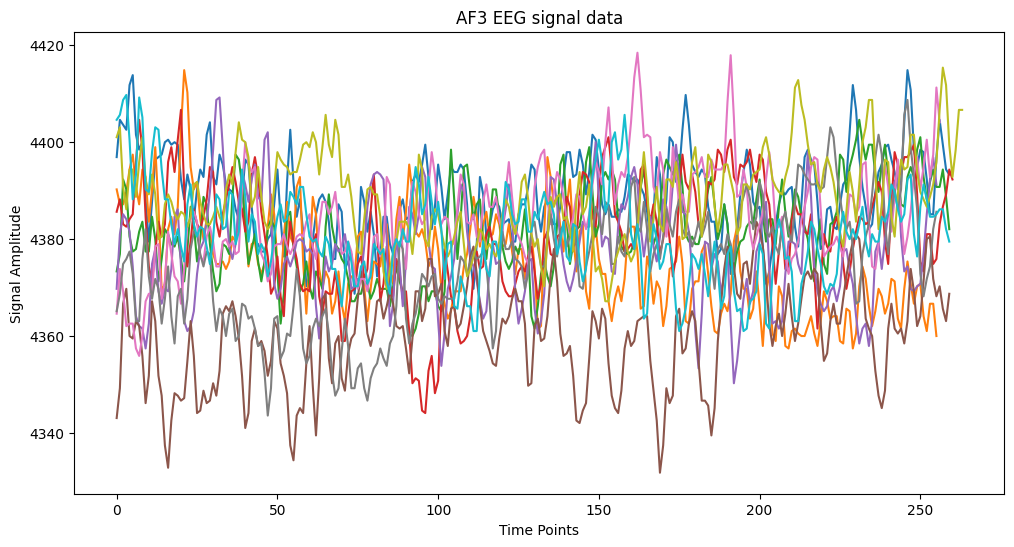

In [57]:
plt.figure(figsize=(12,6))
for event in all_events[:10]:
    plt.plot(event)
    
plt.title('AF3 EEG signal data')
plt.xlabel('Time Points')
plt.ylabel('Signal Amplitude')
plt.show()

Well, that looks like a big mess! even if we change it to just the first 10 events! it still looks like a mess!